# importing library

In [43]:
from sklearn.metrics import r2_score
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
%matplotlib inline
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
%matplotlib inline

# Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.

In [37]:
df = pd.read_csv("Data/Data1Y.csv")

# take a look at the dataset
df.head(11)
#df.describe()

,date,tmin,tmax,prcp,snow,snwd,awnd
0,2017-01-01,41,50,0.54,0.0,0.0,6.49
1,2017-01-02,47,51,1.08,0.0,0.0,5.59
2,2017-01-03,47,56,0.31,0.0,0.0,5.37
3,2017-01-04,41,64,0.00,0.0,0.0,5.82
4,2017-01-05,29,44,0.00,0.0,0.0,2.01
5,2017-01-06,32,43,0.25,0.0,0.0,6.04
6,2017-01-07,20,32,0.60,0.5,0.0,9.62
7,2017-01-08,15,27,0.00,0.0,1.2,4.92
8,2017-01-09,9,31,0.00,0.0,1.2,2.46
9,2017-01-10,24,48,0.00,0.0,1.2,5.14


### Data Exploration

Let's first have a descriptive exploration on our data.


In [38]:
df['date'] = pd.to_datetime(df['date'])

df.head(10)

,date,tmin,tmax,prcp,snow,snwd,awnd
0,2017-01-01,41,50,0.54,0.0,0.0,6.49
1,2017-01-02,47,51,1.08,0.0,0.0,5.59
2,2017-01-03,47,56,0.31,0.0,0.0,5.37
3,2017-01-04,41,64,0.00,0.0,0.0,5.82
4,2017-01-05,29,44,0.00,0.0,0.0,2.01
5,2017-01-06,32,43,0.25,0.0,0.0,6.04
6,2017-01-07,20,32,0.60,0.5,0.0,9.62
7,2017-01-08,15,27,0.00,0.0,1.2,4.92
8,2017-01-09,9,31,0.00,0.0,1.2,2.46
9,2017-01-10,24,48,0.00,0.0,1.2,5.14


In [39]:
df.describe()

,tmin,tmax,prcp,snow,snwd,awnd
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,51.745902,73.475410,0.124426,0.003005,0.009836,6.253770
std,15.681886,15.616402,0.375533,0.034191,0.108345,2.986368
min,9.000000,27.000000,0.000000,0.000000,0.000000,1.120000
25%,39.250000,63.000000,0.000000,0.000000,0.000000,4.030000
50%,53.000000,76.500000,0.000000,0.000000,0.000000,5.820000
75%,65.000000,86.000000,0.050000,0.000000,0.000000,8.050000
max,78.000000,102.000000,4.510000,0.500000,1.200000,17.220000


In [40]:
cdf = df[['tmin' , 'tmax' , 'date']]
cdf

,tmin,tmax,date
0,41,50,2017-01-01
1,47,51,2017-01-02
2,47,56,2017-01-03
3,41,64,2017-01-04
4,29,44,2017-01-05
...,...,...,...
361,18,30,2017-12-28
362,15,42,2017-12-29
363,27,52,2017-12-30
364,23,35,2017-12-31


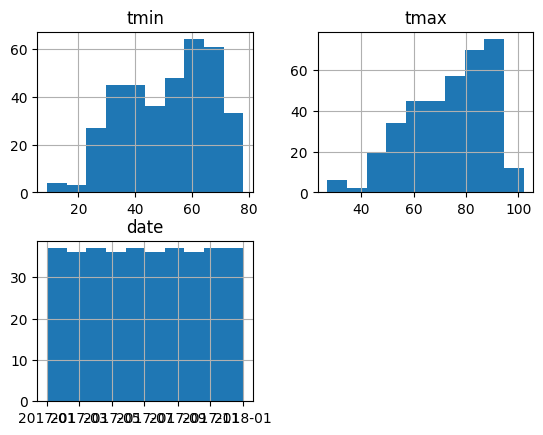

In [41]:
viz = cdf = df[['tmin' , 'tmax' , 'date']]
viz.hist()
plt.show()

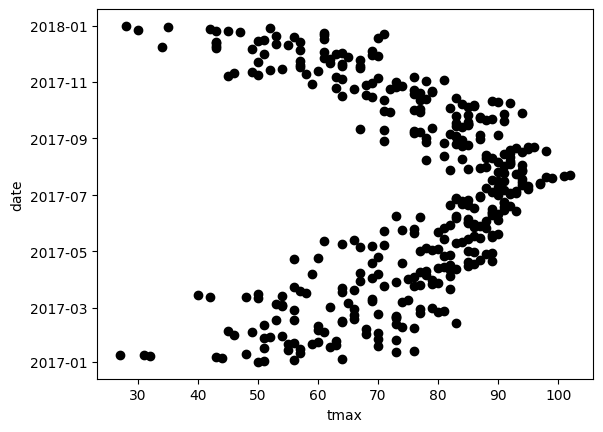

In [42]:
plt.scatter(cdf.tmax , cdf.date ,  color='black')
plt.xlabel("tmax")
plt.ylabel("date")
plt.show()

In [52]:
msk = np.random.rand(len(df)) < 0.6
train = cdf[msk]
test = cdf[~msk]

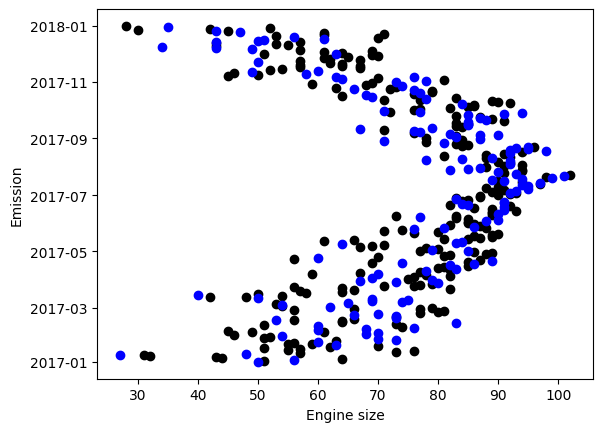

In [53]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.tmax, train.date,  color='black')
ax1.scatter(test.tmax, test.date,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['date']])
train_y = np.asanyarray(train[['tmax']])

test_x = np.asanyarray(test[['date']])
test_y = np.asanyarray(test[['tmax']])


poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 1.48331520e+18, 2.20022398e+36, 3.26362568e+54],
       [1.00000000e+00, 1.48348800e+18, 2.20073665e+36, 3.26476641e+54],
       [1.00000000e+00, 1.48357440e+18, 2.20099300e+36, 3.26533687e+54],
       [1.00000000e+00, 1.48366080e+18, 2.20124937e+36, 3.26590740e+54],
       [1.00000000e+00, 1.48374720e+18, 2.20150575e+36, 3.26647800e+54],
       [1.00000000e+00, 1.48392000e+18, 2.20201857e+36, 3.26761939e+54],
       [1.00000000e+00, 1.48409280e+18, 2.20253144e+36, 3.26876105e+54],
       [1.00000000e+00, 1.48417920e+18, 2.20278790e+36, 3.26933198e+54],
       [1.00000000e+00, 1.48426560e+18, 2.20304437e+36, 3.26990298e+54],
       [1.00000000e+00, 1.48435200e+18, 2.20330086e+36, 3.27047404e+54],
       [1.00000000e+00, 1.48443840e+18, 2.20355736e+36, 3.27104517e+54],
       [1.00000000e+00, 1.48452480e+18, 2.20381388e+36, 3.27161636e+54],
       [1.00000000e+00, 1.48461120e+18, 2.20407042e+36, 3.27218762e+54],
       [1.00000000e+00, 1.48469760e+18, 2.20432696e

In [55]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)


Coefficients:  [[0.00000000e+00 0.00000000e+00 2.39992918e-35]]
Intercept:  [18.68522516]
